<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/test/JADE_AND_Pop_H_Frannk_0_5F_DE_periodic_D10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight
%cd optim_raianars_Insight

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 372 (delta 33), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (372/372), 326.38 KiB | 17.18 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/optim_raianars_Insight


In [2]:
import Function
import Go2MinMax
from GeraIndices import GeraIndices
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
from AvaliaX import AvaliaX

import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### Função
dim=10 # 
fchoice='Periodic'
Fun=Function.Periodic
MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
#MAX=np.repeat(1.28,dim)
#MIN=np.repeat(-1.28,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))


############################### DADOS DE ENTRADA 
RUNS=10 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #00 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/2.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [3]:
!pip install PyFDE

     |████████████████████████████████| 399kB 8.9MB/s 
  Created wheel for PyFDE: filename=PyFDE-1.3.0-cp37-cp37m-linux_x86_64.whl size=974732 sha256=bc9b2ba3eecc7706b437f40e7077afa349ef3ecc8ecd8c5608aa3f3e01e47e51
  Stored in directory: /root/.cache/pip/wheels/7d/42/ba/abf21db37934e576c74fc2c9504b5cd97eb6a99e3dec1743c0
Successfully built PyFDE


In [4]:
import pyfde
solver = pyfde.JADE(Fun, n_dim= dim, n_pop=NPAR, limits=bounds, minimize=True)
solver.p = 0.05
solver.c = 0.1

In [5]:
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]

In [6]:
start_time = time.time()
BEST_AGENTS=[]
BEST_FIT =[]
rows = RUNS
cols = dim + 1
BEST_XY = np.zeros((rows,cols))
for iii in range(RUNS):
  best, fit = solver.run(n_it=ITE)
  kkk = -1
  for xi in best:
    kkk = kkk +1
    BEST_XY[iii,kkk] = xi
  BEST_XY[iii,dim] = -fit
  BEST_AGENTS.append(best)
  TIME = (time.time() - start_time) /60
  BEST_FIT.append(-fit)
  print('ite ', iii,'time ', TIME,'fob =', -fit)
    
############################## Cálculo dos Parâmetros de Avaliação   
JADE_TIME = (time.time() - start_time)/RUNS

ite  0 time  0.0812472383181254 fob = 1.0
ite  1 time  0.16015438238779703 fob = 1.0
ite  2 time  0.2390929142634074 fob = 1.0
ite  3 time  0.3218624949455261 fob = 0.9999948276812698
ite  4 time  0.40588896671930946 fob = 0.9000000000000005
ite  5 time  0.48555667797724406 fob = 0.9
ite  6 time  0.5654120723406474 fob = 0.9
ite  7 time  0.6434243281682333 fob = 0.9
ite  8 time  0.7202286005020142 fob = 0.9
ite  9 time  0.7987637321154276 fob = 0.9


In [7]:
IND_XY = np.argsort(np.array(BEST_XY[:,-1]))
BEST_XY = BEST_XY[IND_XY,:]

In [8]:
JADE_BEST=BEST_XY[0]
JADE_WORSE=BEST_XY[-1]
JADE_MEAN=np.mean(BEST_XY,axis=0)
JADE_MAXFO=BEST_XY[:,-1].max()
JADE_MINFO=BEST_XY[:,-1].min()
JADE_STD=BEST_XY[:,-1].std()
JADE_BEST=BEST_XY[(rows-1),(cols-1)]

In [9]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/ANN_read_matrix


In [10]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [11]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [12]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [13]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [14]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [15]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [16]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.5
Npar1= 52
Npar2= 16
Npar3= 16
Npar4= 16
Npar= 100


In [17]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 1.0687074780464172 FO= 1.0
k= 1 time= 2.1347278078397114 FO= 1.0
k= 2 time= 3.1935195008913677 FO= 1.0
k= 3 time= 4.257856527964274 FO= 1.0
k= 4 time= 5.318416035175323 FO= 1.0
k= 5 time= 6.380404837926229 FO= 1.0
k= 6 time= 7.4643809000651045 FO= 1.0
k= 7 time= 8.528097331523895 FO= 1.0
k= 8 time= 9.5932266831398 FO= 1.0
k= 9 time= 10.656677261988323 FO= 1.0


In [18]:
#len(X2[1,:])
print(cols)

10


In [19]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [20]:
pd.set_option('display.max_columns', 30)  
#print(df)

Text(0, 0.5, 'CR')

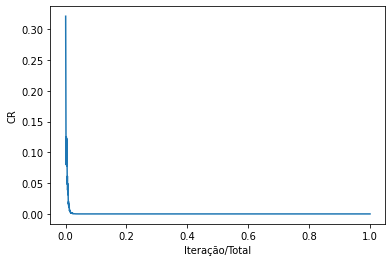

In [21]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

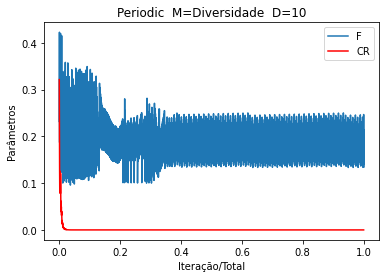

In [22]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Periodic_Diversidade_D=10')

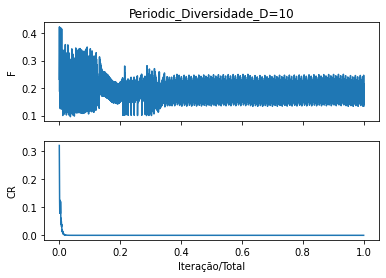

In [23]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [24]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

print('======== JADE ==============')
print('MÉDIA: ',JADE_MEAN[-1])
print('MIN __:',JADE_MINFO)
print('MAX__: ',JADE_MAXFO)
print('STD __:',JADE_STD)
print("Tempo Médio= %.3f segundos ---" % (JADE_TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',JADE_BEST)

print(JADE_MEAN[-1])
print(JADE_STD)
print(JADE_MINFO)

print('================================')

MCS-FRANNK Fator F/DE= 0.50 NPAR= 100 Iterações= 2000 Dim= 10 Min/Max= -10 / 10 _ Periodic
SUB_Fo-0.5_CRo-0.5_D-10_Interv-2000 

MÉDIA:  1.0 STD __: 0.0
MIN __: 1.0 MAX__:  1.0
1.0
0.0
1.0
Tempo Médio= 63.940 segundos ---
10 Rodadas

BEST:  [-9.42477796e+00  9.42477796e+00 -9.42477796e+00  4.00049136e-09
  9.42477796e+00  9.42477796e+00 -8.84741036e-10 -6.28318531e+00
  3.14159265e+00 -9.42477796e+00  1.00000000e+00]
======== JADE ==============
MÉDIA:  0.9399994827681271
MIN __: 0.9
MAX__:  1.0
STD __: 0.04898916139905839
Tempo Médio= 4.793 segundos ---
10 Rodadas

BEST:  1.0
0.9399994827681271
0.04898916139905839
0.9


In [25]:
print('FRANNK POP H                 JADE')
print(MEAN[-1],'       ',JADE_MEAN[-1])
print(STD,'      ',JADE_STD)
print(MINFO,'       ',JADE_MINFO)


FRANNK POP H                 JADE
1.0         0.9399994827681271
0.0        0.04898916139905839
1.0         0.9
